In [10]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt

In [11]:
def PowerIteration(A,v):
    """
        Given a square matrix A and a column vector v of matching size to initialize 
        the iteration this function implements the power iteration to approximate the 
        largest Eigenvalue of A. It returns a list of successive approximations where 
        the last approximation is the best one.
    """
    v = v/np.linalg.norm(v)
    result = []
    for k in range(100):
        v = A @ v
        v = v/np.linalg.norm(v)
        rayleigh_quotient = v.T @ A @ v
        result.append(rayleigh_quotient[0][0])
    return result


def RayleighQuotientIteration(A,v):
    """
        Given a square matrix A and a column vector v of matching size to initialize 
        the iteration this function implements the Rayleigh quotient iteration to 
        approximate the Eigenvalue of A whose Eigenvector is closest to v. It returns 
        a list of successive approximations where the last approximation is the best 
        one.
    """
    v = v/np.linalg.norm(v)
    rayleigh = (v.T @ A @ v)[0][0]
    LambdaList = [rayleigh]
    for k in range(100):
        w = np.linalg.solve(A - rayleigh * np.eye(A.shape[0]), v)
        v = w/np.linalg.norm(w)
        rayleigh = v.T @ A @ v
        LambdaList.append(rayleigh)
    return LambdaList

[45.1 45.2 45.3 45.4 45.5 45.6 45.7 45.8 45.9 46.  46.1 46.2 46.3 46.4
 46.5 46.6 46.7 46.8 46.9 47.  47.1 47.2 47.3 47.4 47.5 47.6 47.7 47.8
 47.9 48.  48.1 48.2 48.3 48.4 48.5 48.6 48.7 48.8 48.9 49.  49.1 49.2
 49.3 49.4 49.5 49.6 49.7 49.8 49.9 50. ]


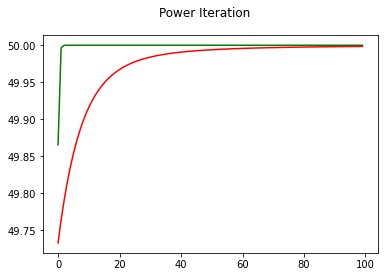

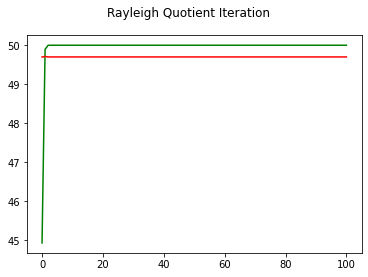

In [15]:
Matrizen=scipy.io.loadmat("Matrizen.mat")
A1=Matrizen["A1"]
A2=Matrizen["A2"]
Startvektor=Matrizen["Startvektor"]

plt.suptitle('Power Iteration')
LambdaList=PowerIteration(A1,Startvektor)
plt.plot(LambdaList,color="g")
LambdaList=PowerIteration(A2,Startvektor)
plt.plot(LambdaList,color="r")

plt.figure()
plt.suptitle("Rayleigh Quotient Iteration")
LambdaList=RayleighQuotientIteration(A1,Startvektor)
plt.plot(LambdaList,"g")
LambdaList=RayleighQuotientIteration(A2,Startvektor)
plt.plot(LambdaList,"r")

plt.show()